# The easiest assignment in this course

Cope one of these notebooks (`Linear SoftMax Classifier.ipynb`, `Polynomial SoftMax Classifier.ipynb`) and replace the model with multilayer neural network. Play with nonlinearities, also generate your own, more entangled data and check your models perfrmance. Good luck!

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

In [4]:
import tensorflow as tf

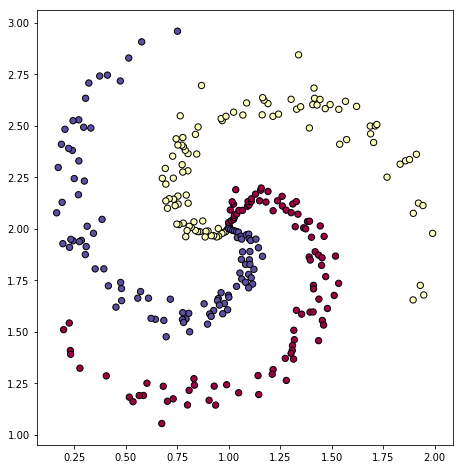

In [11]:



N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
X[:, 0] += 1
X[:, 1] += 2
# lets visualize the data:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
ax = plt.gca()
ax.set_aspect("equal")
plt.show()

In [4]:
def plot(h=0.02):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))
    Z = sess.run(t_prediction, feed_dict={t_x: np.column_stack([xx.ravel(), yy.ravel()])})
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.gca().set_aspect("equal")
    plt.show()

### Neaural Network

In [15]:
input_X = tf.placeholder(tf.float32, shape = [None, 2], name = 'inputs')
target_y = tf.placeholder(tf.int32, shape = [None], name = 'target')
l1 = tf.layers.dense(input_X, units = 20, activation = tf.nn.relu)
l2 = tf.layers.dense(l1, units = 3, activation = None)
l_out = tf.nn.softmax(l2, name = 'predict_proba')
y_predicted = tf.argmax(l2, axis = 1)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=target_y, logits=l2, name="softmax_loss"))
accuracy, update_accuracy = tf.metrics.accuracy(target_y, y_predicted)
optimzer = tf.train.AdamOptimizer(learning_rate=0.01)
train_step = optimzer.minimize(loss)

In [16]:
def iterate_minibatches(inputs, targets, batchsize):
    assert len(inputs) == len(targets)
    indices = np.arange(len(inputs))
    np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        excerpt = indices[start_idx:start_idx + batchsize]
        yield inputs[excerpt], targets[excerpt]

In [19]:
import time

num_epochs = 1000 # amount of passes through the data

batch_size = 300 # number of samples processed at each function call

with tf.Session() as sess:
    #initialize global wariables
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        train_err = 0
        train_batches = 0
        start_time = time.time()

        sess.run(tf.local_variables_initializer())
        for batch in iterate_minibatches(X, y,batch_size):
            inputs, targets = batch

            _, train_err_batch, _ = sess.run(
                [train_step, loss, update_accuracy],
                feed_dict={input_X: inputs, target_y:targets}
            )
            train_err += train_err_batch
            train_batches += 1
        train_acc = sess.run(accuracy)

        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))

        print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
        print("  train accuracy:\t\t{:.2f} %".format(
            train_acc * 100))


Epoch 1 of 1000 took 0.122s
  training loss (in-iteration):		1.236402
  train accuracy:		33.33 %
Epoch 2 of 1000 took 0.081s
  training loss (in-iteration):		1.189452
  train accuracy:		33.33 %
Epoch 3 of 1000 took 0.081s
  training loss (in-iteration):		1.157108
  train accuracy:		35.67 %
Epoch 4 of 1000 took 0.082s
  training loss (in-iteration):		1.137658
  train accuracy:		30.67 %
Epoch 5 of 1000 took 0.078s
  training loss (in-iteration):		1.128075
  train accuracy:		35.33 %
Epoch 6 of 1000 took 0.083s
  training loss (in-iteration):		1.124993
  train accuracy:		29.00 %
Epoch 7 of 1000 took 0.086s
  training loss (in-iteration):		1.124621
  train accuracy:		25.00 %
Epoch 8 of 1000 took 0.083s
  training loss (in-iteration):		1.123614
  train accuracy:		23.00 %
Epoch 9 of 1000 took 0.075s
  training loss (in-iteration):		1.120501
  train accuracy:		23.67 %
Epoch 10 of 1000 took 0.089s
  training loss (in-iteration):		1.115163
  train accuracy:		25.00 %
Epoch 11 of 1000 took 0.075s


Epoch 85 of 1000 took 0.092s
  training loss (in-iteration):		0.746524
  train accuracy:		57.33 %
Epoch 86 of 1000 took 0.079s
  training loss (in-iteration):		0.744570
  train accuracy:		57.00 %
Epoch 87 of 1000 took 0.094s
  training loss (in-iteration):		0.742661
  train accuracy:		57.00 %
Epoch 88 of 1000 took 0.090s
  training loss (in-iteration):		0.740811
  train accuracy:		57.00 %
Epoch 89 of 1000 took 0.080s
  training loss (in-iteration):		0.739011
  train accuracy:		57.33 %
Epoch 90 of 1000 took 0.099s
  training loss (in-iteration):		0.737255
  train accuracy:		56.67 %
Epoch 91 of 1000 took 0.093s
  training loss (in-iteration):		0.735551
  train accuracy:		56.67 %
Epoch 92 of 1000 took 0.077s
  training loss (in-iteration):		0.733896
  train accuracy:		56.67 %
Epoch 93 of 1000 took 0.092s
  training loss (in-iteration):		0.732285
  train accuracy:		56.67 %
Epoch 94 of 1000 took 0.092s
  training loss (in-iteration):		0.730720
  train accuracy:		56.67 %
Epoch 95 of 1000 too

Epoch 169 of 1000 took 0.084s
  training loss (in-iteration):		0.647037
  train accuracy:		62.33 %
Epoch 170 of 1000 took 0.079s
  training loss (in-iteration):		0.645853
  train accuracy:		62.33 %
Epoch 171 of 1000 took 0.080s
  training loss (in-iteration):		0.644641
  train accuracy:		62.33 %
Epoch 172 of 1000 took 0.080s
  training loss (in-iteration):		0.643425
  train accuracy:		62.67 %
Epoch 173 of 1000 took 0.081s
  training loss (in-iteration):		0.642256
  train accuracy:		62.33 %
Epoch 174 of 1000 took 0.084s
  training loss (in-iteration):		0.641093
  train accuracy:		62.00 %
Epoch 175 of 1000 took 0.079s
  training loss (in-iteration):		0.639936
  train accuracy:		62.33 %
Epoch 176 of 1000 took 0.083s
  training loss (in-iteration):		0.638756
  train accuracy:		62.33 %
Epoch 177 of 1000 took 0.082s
  training loss (in-iteration):		0.637567
  train accuracy:		62.33 %
Epoch 178 of 1000 took 0.082s
  training loss (in-iteration):		0.636370
  train accuracy:		62.33 %
Epoch 179 

Epoch 253 of 1000 took 0.086s
  training loss (in-iteration):		0.542784
  train accuracy:		72.33 %
Epoch 254 of 1000 took 0.086s
  training loss (in-iteration):		0.541499
  train accuracy:		72.67 %
Epoch 255 of 1000 took 0.083s
  training loss (in-iteration):		0.540214
  train accuracy:		72.67 %
Epoch 256 of 1000 took 0.090s
  training loss (in-iteration):		0.538941
  train accuracy:		72.33 %
Epoch 257 of 1000 took 0.084s
  training loss (in-iteration):		0.537667
  train accuracy:		72.33 %
Epoch 258 of 1000 took 0.087s
  training loss (in-iteration):		0.536380
  train accuracy:		72.67 %
Epoch 259 of 1000 took 0.086s
  training loss (in-iteration):		0.535100
  train accuracy:		72.67 %
Epoch 260 of 1000 took 0.079s
  training loss (in-iteration):		0.533828
  train accuracy:		72.67 %
Epoch 261 of 1000 took 0.085s
  training loss (in-iteration):		0.532552
  train accuracy:		72.67 %
Epoch 262 of 1000 took 0.082s
  training loss (in-iteration):		0.531269
  train accuracy:		72.67 %
Epoch 263 

Epoch 336 of 1000 took 0.120s
  training loss (in-iteration):		0.435842
  train accuracy:		78.67 %
Epoch 337 of 1000 took 0.117s
  training loss (in-iteration):		0.434575
  train accuracy:		78.67 %
Epoch 338 of 1000 took 0.121s
  training loss (in-iteration):		0.433308
  train accuracy:		78.67 %
Epoch 339 of 1000 took 0.126s
  training loss (in-iteration):		0.432046
  train accuracy:		78.67 %
Epoch 340 of 1000 took 0.119s
  training loss (in-iteration):		0.430786
  train accuracy:		78.67 %
Epoch 341 of 1000 took 0.124s
  training loss (in-iteration):		0.429532
  train accuracy:		79.00 %
Epoch 342 of 1000 took 0.124s
  training loss (in-iteration):		0.428274
  train accuracy:		79.00 %
Epoch 343 of 1000 took 0.138s
  training loss (in-iteration):		0.427013
  train accuracy:		78.67 %
Epoch 344 of 1000 took 0.136s
  training loss (in-iteration):		0.425756
  train accuracy:		79.00 %
Epoch 345 of 1000 took 0.125s
  training loss (in-iteration):		0.424496
  train accuracy:		79.67 %
Epoch 346 

Epoch 419 of 1000 took 0.093s
  training loss (in-iteration):		0.341787
  train accuracy:		88.00 %
Epoch 420 of 1000 took 0.103s
  training loss (in-iteration):		0.340881
  train accuracy:		88.00 %
Epoch 421 of 1000 took 0.101s
  training loss (in-iteration):		0.339942
  train accuracy:		88.33 %
Epoch 422 of 1000 took 0.102s
  training loss (in-iteration):		0.339018
  train accuracy:		88.00 %
Epoch 423 of 1000 took 0.101s
  training loss (in-iteration):		0.338145
  train accuracy:		88.33 %
Epoch 424 of 1000 took 0.094s
  training loss (in-iteration):		0.337352
  train accuracy:		88.00 %
Epoch 425 of 1000 took 0.110s
  training loss (in-iteration):		0.336701
  train accuracy:		87.33 %
Epoch 426 of 1000 took 0.099s
  training loss (in-iteration):		0.336180
  train accuracy:		87.67 %
Epoch 427 of 1000 took 0.100s
  training loss (in-iteration):		0.335606
  train accuracy:		88.00 %
Epoch 428 of 1000 took 0.101s
  training loss (in-iteration):		0.334475
  train accuracy:		88.00 %
Epoch 429 

Epoch 502 of 1000 took 0.104s
  training loss (in-iteration):		0.282127
  train accuracy:		90.33 %
Epoch 503 of 1000 took 0.117s
  training loss (in-iteration):		0.281581
  train accuracy:		89.67 %
Epoch 504 of 1000 took 0.096s
  training loss (in-iteration):		0.281034
  train accuracy:		90.33 %
Epoch 505 of 1000 took 0.097s
  training loss (in-iteration):		0.280493
  train accuracy:		89.67 %
Epoch 506 of 1000 took 0.099s
  training loss (in-iteration):		0.279972
  train accuracy:		90.67 %
Epoch 507 of 1000 took 0.119s
  training loss (in-iteration):		0.279447
  train accuracy:		89.67 %
Epoch 508 of 1000 took 0.102s
  training loss (in-iteration):		0.278908
  train accuracy:		90.67 %
Epoch 509 of 1000 took 0.099s
  training loss (in-iteration):		0.278349
  train accuracy:		90.33 %
Epoch 510 of 1000 took 0.109s
  training loss (in-iteration):		0.277754
  train accuracy:		90.67 %
Epoch 511 of 1000 took 0.102s
  training loss (in-iteration):		0.277120
  train accuracy:		90.00 %
Epoch 512 

Epoch 585 of 1000 took 0.105s
  training loss (in-iteration):		0.241509
  train accuracy:		91.67 %
Epoch 586 of 1000 took 0.109s
  training loss (in-iteration):		0.241136
  train accuracy:		91.67 %
Epoch 587 of 1000 took 0.110s
  training loss (in-iteration):		0.240755
  train accuracy:		91.67 %
Epoch 588 of 1000 took 0.109s
  training loss (in-iteration):		0.240365
  train accuracy:		91.33 %
Epoch 589 of 1000 took 0.094s
  training loss (in-iteration):		0.239993
  train accuracy:		91.67 %
Epoch 590 of 1000 took 0.101s
  training loss (in-iteration):		0.239625
  train accuracy:		91.33 %
Epoch 591 of 1000 took 0.101s
  training loss (in-iteration):		0.239276
  train accuracy:		91.67 %
Epoch 592 of 1000 took 0.107s
  training loss (in-iteration):		0.238964
  train accuracy:		91.00 %
Epoch 593 of 1000 took 0.113s
  training loss (in-iteration):		0.238687
  train accuracy:		91.67 %
Epoch 594 of 1000 took 0.106s
  training loss (in-iteration):		0.238405
  train accuracy:		91.00 %
Epoch 595 

Epoch 669 of 1000 took 0.104s
  training loss (in-iteration):		0.214476
  train accuracy:		92.33 %
Epoch 670 of 1000 took 0.110s
  training loss (in-iteration):		0.214181
  train accuracy:		92.67 %
Epoch 671 of 1000 took 0.109s
  training loss (in-iteration):		0.213872
  train accuracy:		92.33 %
Epoch 672 of 1000 took 0.105s
  training loss (in-iteration):		0.213589
  train accuracy:		92.67 %
Epoch 673 of 1000 took 0.112s
  training loss (in-iteration):		0.213329
  train accuracy:		92.67 %
Epoch 674 of 1000 took 0.109s
  training loss (in-iteration):		0.213071
  train accuracy:		92.67 %
Epoch 675 of 1000 took 0.111s
  training loss (in-iteration):		0.212817
  train accuracy:		92.67 %
Epoch 676 of 1000 took 0.109s
  training loss (in-iteration):		0.212582
  train accuracy:		92.33 %
Epoch 677 of 1000 took 0.107s
  training loss (in-iteration):		0.212345
  train accuracy:		92.67 %
Epoch 678 of 1000 took 0.109s
  training loss (in-iteration):		0.212100
  train accuracy:		92.33 %
Epoch 679 

Epoch 753 of 1000 took 0.148s
  training loss (in-iteration):		0.195188
  train accuracy:		93.33 %
Epoch 754 of 1000 took 0.144s
  training loss (in-iteration):		0.194963
  train accuracy:		93.00 %
Epoch 755 of 1000 took 0.148s
  training loss (in-iteration):		0.194772
  train accuracy:		93.00 %
Epoch 756 of 1000 took 0.144s
  training loss (in-iteration):		0.194594
  train accuracy:		93.00 %
Epoch 757 of 1000 took 0.131s
  training loss (in-iteration):		0.194421
  train accuracy:		93.00 %
Epoch 758 of 1000 took 0.127s
  training loss (in-iteration):		0.194227
  train accuracy:		93.33 %
Epoch 759 of 1000 took 0.129s
  training loss (in-iteration):		0.194013
  train accuracy:		93.00 %
Epoch 760 of 1000 took 0.129s
  training loss (in-iteration):		0.193813
  train accuracy:		93.00 %
Epoch 761 of 1000 took 0.130s
  training loss (in-iteration):		0.193650
  train accuracy:		93.33 %
Epoch 762 of 1000 took 0.128s
  training loss (in-iteration):		0.193465
  train accuracy:		93.00 %
Epoch 763 

Epoch 837 of 1000 took 0.134s
  training loss (in-iteration):		0.180774
  train accuracy:		93.00 %
Epoch 838 of 1000 took 0.127s
  training loss (in-iteration):		0.180684
  train accuracy:		94.00 %
Epoch 839 of 1000 took 0.130s
  training loss (in-iteration):		0.180567
  train accuracy:		93.00 %
Epoch 840 of 1000 took 0.129s
  training loss (in-iteration):		0.180368
  train accuracy:		93.67 %
Epoch 841 of 1000 took 0.133s
  training loss (in-iteration):		0.180138
  train accuracy:		93.00 %
Epoch 842 of 1000 took 0.131s
  training loss (in-iteration):		0.179888
  train accuracy:		94.00 %
Epoch 843 of 1000 took 0.132s
  training loss (in-iteration):		0.179657
  train accuracy:		93.33 %
Epoch 844 of 1000 took 0.131s
  training loss (in-iteration):		0.179465
  train accuracy:		93.33 %
Epoch 845 of 1000 took 0.131s
  training loss (in-iteration):		0.179293
  train accuracy:		93.67 %
Epoch 846 of 1000 took 0.133s
  training loss (in-iteration):		0.179159
  train accuracy:		93.33 %
Epoch 847 

Epoch 921 of 1000 took 0.102s
  training loss (in-iteration):		0.168428
  train accuracy:		93.67 %
Epoch 922 of 1000 took 0.105s
  training loss (in-iteration):		0.168335
  train accuracy:		94.00 %
Epoch 923 of 1000 took 0.102s
  training loss (in-iteration):		0.168237
  train accuracy:		93.33 %
Epoch 924 of 1000 took 0.103s
  training loss (in-iteration):		0.168114
  train accuracy:		94.00 %
Epoch 925 of 1000 took 0.100s
  training loss (in-iteration):		0.167953
  train accuracy:		93.67 %
Epoch 926 of 1000 took 0.103s
  training loss (in-iteration):		0.167796
  train accuracy:		94.00 %
Epoch 927 of 1000 took 0.107s
  training loss (in-iteration):		0.167667
  train accuracy:		93.67 %
Epoch 928 of 1000 took 0.102s
  training loss (in-iteration):		0.167550
  train accuracy:		93.67 %
Epoch 929 of 1000 took 0.114s
  training loss (in-iteration):		0.167410
  train accuracy:		94.00 %
Epoch 930 of 1000 took 0.107s
  training loss (in-iteration):		0.167264
  train accuracy:		93.67 %
Epoch 931 